<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">In Context: </span> Exploratory Analysis</h1>



<br><hr id="toc">

### In this lesson...

In this lesson, we'll go through the essential exploratory analysis steps:
1. [Basic information](#basic)
2. [Distributions of numeric features](#numeric)
3. [Distributions of categorical features](#categorical)
4. [Segmentations](#segmentations)
5. [Correlations](#correlations)

<hr>

### First, let's import libraries and load the dataset.

In general, it's good practice to keep all of your library imports at the top of your notebook or program.

In [1]:
# Numerical
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

##### Next, let's import the dataset.

In [3]:
# Load real estate data from CSV
df = pd.read_csv('../data/real_estate_data.csv')

<br>

<br id="basic">

# 1. Basic information

First, always look at basic information about the dataset.

#### Display the dimensions of the dataset.

In [4]:
# Dataframe dimensions
df.shape

(1883, 26)

#### Next, display the data types of our features.

In [5]:
# Column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 26 columns):
tx_price              1883 non-null int64
beds                  1883 non-null int64
baths                 1883 non-null int64
sqft                  1883 non-null int64
year_built            1883 non-null int64
lot_size              1883 non-null int64
property_type         1883 non-null object
exterior_walls        1660 non-null object
roof                  1529 non-null object
basement              1657 non-null float64
restaurants           1883 non-null int64
groceries             1883 non-null int64
nightlife             1883 non-null int64
cafes                 1883 non-null int64
shopping              1883 non-null int64
arts_entertainment    1883 non-null int64
beauty_spas           1883 non-null int64
active_life           1883 non-null int64
median_age            1883 non-null float64
married               1883 non-null float64
college_grad          1883 non-null float64


In [7]:
df.isnull().sum()

tx_price                0
beds                    0
baths                   0
sqft                    0
year_built              0
lot_size                0
property_type           0
exterior_walls        223
roof                  354
basement              226
restaurants             0
groceries               0
nightlife               0
cafes                   0
shopping                0
arts_entertainment      0
beauty_spas             0
active_life             0
median_age              0
married                 0
college_grad            0
property_tax            0
insurance               0
median_school           0
num_schools             0
tx_year                 0
dtype: int64

#### Display the first 5 rows to see example observations.

In [8]:
# Display first 5 rows of df
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [9]:
df["property_type"].unique()

array(['Apartment / Condo / Townhouse', 'Single-Family'], dtype=object)

<br>

In [10]:
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 1.1</span>

Before moving on, let's dig a bit deeper into some of these functionalities. Getting some extra practice right now will set you up for smoother success as you continue through the project.
<br>

**First, try to filter df.dtypes to only categorical variables:**

**Tip:** Remember the boolean filtering we've been talking about?

In [11]:
# Filter and display only df.dtypes that are 'object'
df.dtypes[df.dtypes == 'object']

property_type     object
exterior_walls    object
roof              object
dtype: object

In [13]:
df.dtypes[df.dtypes == 'object'].index # now I can iterate through it 

Index(['property_type', 'exterior_walls', 'roof'], dtype='object')

#### Iterate through the categorical feature names and print each name.

In [ ]:
# Loop through categorical feature names and print each one
for cat_feature in df.dtypes[df.dtypes == 'object'].index:
    print(cat_feature)

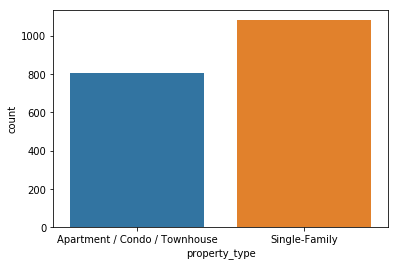

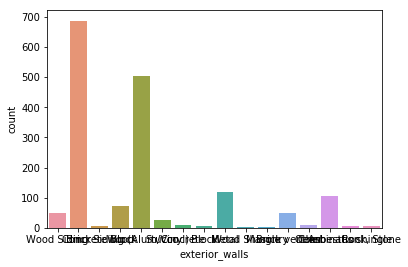

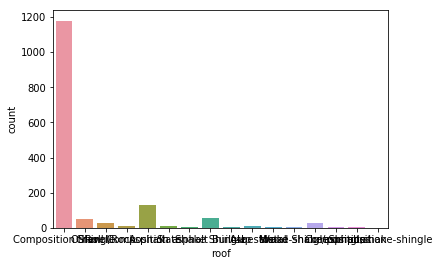

In [14]:
# Loop through categorical feature names and print each one
for cat_feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(df[cat_feature])
    plt.show()

As you'll see later, the ability to select feature names based on some condition (instead of manually typing out each one) will be quite useful.

<br>

**Next**, look at a few more examples by displaying the first 10 rows of data, instead of just the first 5

In [15]:
# Display the first 10 rows of data
df.head(10)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,146,10,23,27,86,9,60,52,28.0,15.0,86.0,168.0,58.0,8.0,3.0,2004
6,240000,1,1,642,1944,0,Single-Family,Brick,NaN,NaN,159,13,36,17,92,12,66,50,28.0,36.0,88.0,176.0,61.0,7.0,3.0,2011
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,266.0,92.0,9.0,3.0,2005
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,51,8,6,2,40,18,32,41,36.0,49.0,77.0,188.0,65.0,6.0,3.0,2013
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,119,10,26,25,183,13,70,36,57.0,13.0,83.0,147.0,51.0,6.0,3.0,2007


Finally, it's also helpful to look at the last 5 rows of data.
* Sometimes datasets will have **corrupted data** hiding at the very end (depending on the data source).
* It never hurts to double-check.

In [ ]:
# Display last 5 rows of data
df.tail()

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
    
[Back to Contents](#toc)
</div>
<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<br>

<br id="numeric">

# 2. Distributions of numeric features

One of the most enlightening data exploration tasks is plotting the distributions of your features.

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 1.2</span>

**Plot the histogram grid, but make it larger, and rotate the x-axis labels clockwise by 45 degrees.**
* <code style="color:steelblue">df.hist()</code> has a <code style="color:steelblue">figsize=</code> argument takes a tuple for figure size.
* Try making the figure size 14 x 14
* <code style="color:steelblue">df.hist()</code> has a <code style="color:steelblue">xrot=</code> argument rotates x-axis labels **counter-clockwise**.
* The [documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.hist.html) is useful for learning more about the arguments to the <code style="color:steelblue">.hist()</code> function.
* **Tip:** It's ok to arrive at the answer through **trial and error** (this is often easier than memorizing the various arguments).

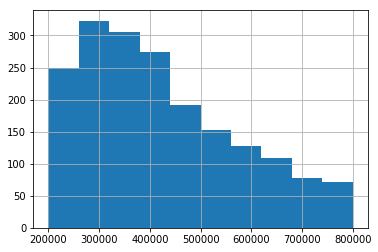

In [17]:
df['tx_price'].hist()
plt.show()

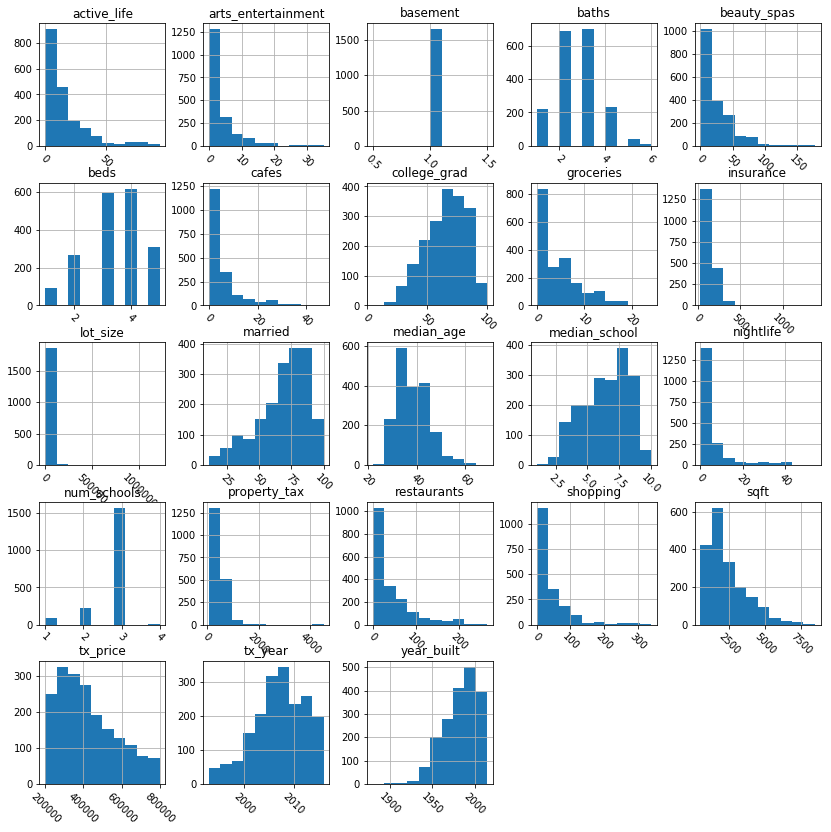

In [18]:
# Plot histogram grid
df.hist(xrot=-45, figsize=(14, 14)) # xrot rotates x axis values

# Clear the text "residue"
plt.show()

#### Display summary statistics for the numerical features.

In [19]:
# Summarize numerical features
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


In [20]:
# Summarize numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tx_price,1883.0,422839.807754,151462.593276,200000.0,300000.0,392000.0,525000.0,800000.0
beds,1883.0,3.420605,1.068554,1.0,3.0,3.0,4.0,5.0
baths,1883.0,2.579926,0.945576,1.0,2.0,3.0,3.0,6.0
sqft,1883.0,2329.398832,1336.991858,500.0,1345.0,1907.0,3005.0,8450.0
year_built,1883.0,1982.963887,20.295945,1880.0,1970.0,1986.0,2000.0,2015.0
lot_size,1883.0,13392.620287,44949.303601,0.0,1542.0,6098.0,11761.0,1220551.0
basement,1657.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
restaurants,1883.0,40.210303,46.867012,0.0,7.0,23.0,58.0,266.0
groceries,1883.0,4.505045,4.491029,0.0,1.0,3.0,7.0,24.0
nightlife,1883.0,5.074881,8.464668,0.0,0.0,2.0,6.0,54.0


<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
    
[Back to Contents](#toc)
</div>

<br id="categorical">

# 3. Distributions of categorical features

Next, let's take a look at the distributions of our categorical features.

<br>
Display summary statistics for categorical features.

In [21]:
# Summarize categorical features
df.describe(include=["object"])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


In [22]:
# Summarize categorical features
df.describe(include=["object"]).T

,count,unique,top,freq
property_type,1883,2,Single-Family,1080
exterior_walls,1660,16,Brick,687
roof,1529,16,Composition Shingle,1179


Plot bar plot for the <code style="color:steelblue">'exterior_walls'</code> feature.

In [25]:
df["exterior_walls"].value_counts(dropna=False)

Brick                  687
Siding (Alum/Vinyl)    503
NaN                    223
Metal                  120
Combination            107
Wood                    72
Wood Siding             49
Brick veneer            48
Stucco                  26
Other                   10
Concrete                 8
Block                    7
Concrete Block           7
Asbestos shingle         6
Rock, Stone              5
Masonry                  3
Wood Shingle             2
Name: exterior_walls, dtype: int64

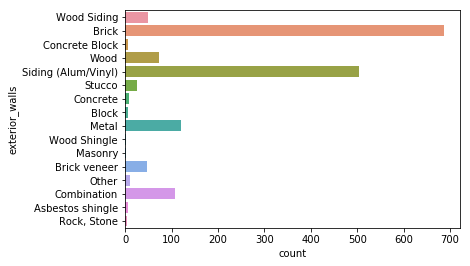

In [27]:
# Bar plot for 'exterior_walls'
sns.countplot(y="exterior_walls", data=df)
plt.show()

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 1.3</span>

**Write a <code style="color:steelblue">for</code> loop to plot bar plots of each of the categorical features.**
* Write the loop to be able to handle any number of categorical features (borrow from your answer to <span style="color:royalblue">Exercise 1.1</span>).
* Invoke <code style="color:steelblue">plt.show()</code> after each bar plot to display all 3 plots in one output.
* Which features suffer from sparse classes?

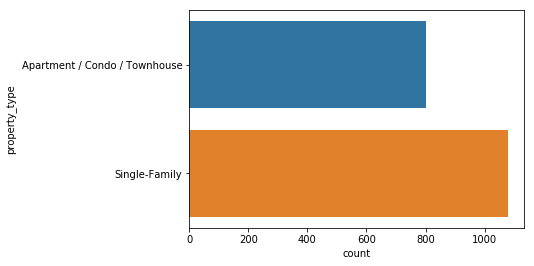

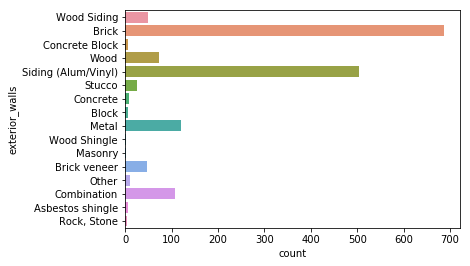

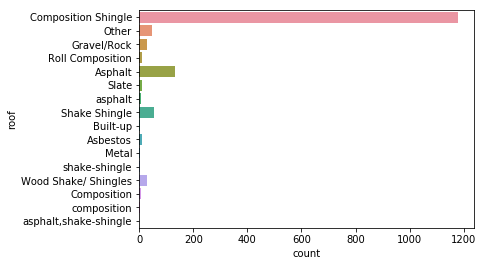

In [28]:
# Plot bar plot for each categorical feature
for features in df.dtypes[df.dtypes == "object"].index: 
    sns.countplot(y=features, data=df)
    plt.show()

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
    
[Back to Contents](#toc)
</div>

<br id="segmentations">

# 4. Segmentations

Next, let's create some segmentations. Segmentations are powerful ways to cut the data to observe the relationship between **categorical features** and **numeric features**.

<br>
Segment <code style="color:steelblue">'tx_price'</code> by <code style="color:steelblue">'property_type'</code> and plot the resulting distributions

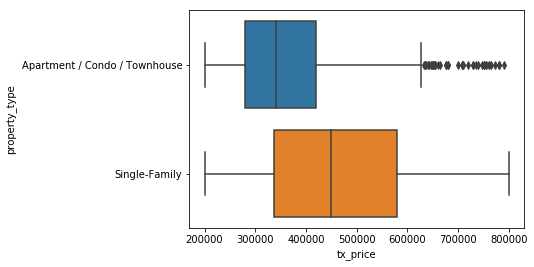

In [29]:
# Segment tx_price by property_type and plot distributions
sns.boxplot(y= "property_type", x= "tx_price", data=df)
plt.show()

### outliers = 3.5 * the iqr (inter quartile range 25% to 75%)

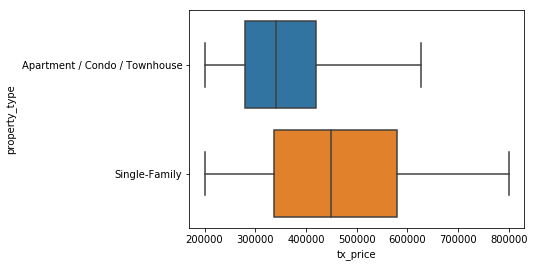

In [31]:
# Segment tx_price by property_type and plot distributions
sns.boxplot(y= "property_type", x= "tx_price", data=df, sym="") # show no outliers
plt.show()

Segment by <code style="color:steelblue">'property_type'</code> and calculate the average value of each feature within each class:

In [33]:
# Segment by property_type and display the means within each class
df.groupby("property_type").mean().T

property_type,Apartment / Condo / Townhouse,Single-Family
tx_price,366614.034869,464644.711111
beds,2.601494,4.029630
baths,2.200498,2.862037
sqft,1513.727273,2935.865741
year_built,1988.936488,1978.523148
lot_size,3944.239103,20417.666667
basement,1.000000,1.000000
restaurants,58.418431,26.672222
groceries,5.919054,3.453704
nightlife,7.855542,3.007407


### Filtering Groupby

In [34]:
# Segment by property_type and display the means within each class
df.groupby("property_type")[["baths", 'cafes']].mean().T

property_type,Apartment / Condo / Townhouse,Single-Family
baths,2.200498,2.862037
cafes,8.037360,3.308333


<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 1.4</span>

On average, it looks like single family homes are more expensive.

How else do the different property types differ? Let's see:

<br>

**First, segment <code style="color:steelblue">'sqft'</code> by <code style="color:steelblue">'property_type'</code> and plot the boxplots.**

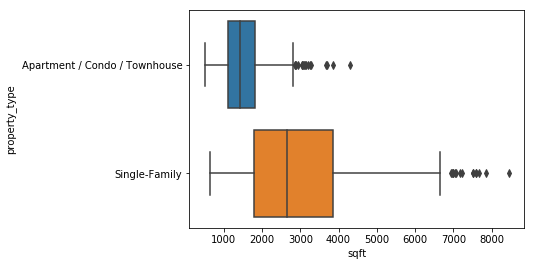

In [35]:
# Segment sqft by sqft and property_type distributions
sns.boxplot(y="property_type", x="sqft", data=df)
plt.show()

<br>

**After producing the plot, consider these questions:**
* Which type of property is larger, on average?
* Which type of property sees greater variance in sizes?
* Does the difference in distributions between classes make intuitive sense?

<br>

**Next, display the standard deviations of each feature alongside their means after performing a groupby.**
* This will give you a better idea of the variation within in feature, by class.

* **Tip:** Pass a list of metrics into the <code style="color:steelblue">.agg()</code> function, after performing your groupby.

* Check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for more help.

### ```.agg()``` means aggregate

In [36]:
# Segment by property_type and display the means and standard deviations within each class
df.groupby("property_type").agg([np.mean, np.std])

tx_price                     beds  \
                                        mean            std      mean   
property_type                                                           
Apartment / Condo / Townhouse  366614.034869  121784.490486  2.601494   
Single-Family                  464644.711111  157758.739013  4.029630   

                                            baths                   sqft  \
                                    std      mean       std         mean   
property_type                                                              
Apartment / Condo / Townhouse  0.810220  2.200498  0.815009  1513.727273   
Single-Family                  0.795639  2.862037  0.937551  2935.865741   

                                             year_built             \
                                       std         mean        std   
property_type                                                        
Apartment / Condo / Townhouse   556.286650  1988.936488  15.513640   
Single-Family                  1422.871169  1978.523148  22.210582   

                                   lot_size               basement       \
                                       mean           std     mean  std   
property_type                                                             
Apartment / Condo / Townhouse   3944.239103  44284.168767      1.0  0.0   
Single-Family                  20417.666667  44165.529302      1.0  0.0   

                              restaurants            groceries            \
                                     mean        std      mean       std   
property_type                                                              
Apartment / Condo / Townhouse   58.418431  54.343594  5.919054  4.645774   
Single-Family                   26.672222  34.726416  3.453704  4.067285   

                              nightlife                cafes            \
                                   mean        std      mean       std   
property_type                                                            
Apartment / Condo / Townhouse  7.855542  10.643816  8.037360  9.077038   
Single-Family                  3.007407   5.543822  3.308333  5.325053   

                                shopping            arts_entertainment  \
                                    mean        std               mean   
property_type                                                            
Apartment / Condo / Townhouse  57.631382  61.852299           4.840598   
Single-Family                  28.289815  42.292313           2.318519   

                                        beauty_spas            active_life  \
                                    std        mean        std        mean   
property_type                                                                
Apartment / Condo / Townhouse  5.234834   32.087173  26.910443   22.410959   
Single-Family                  3.929691   16.970370  22.872112   10.946296   

                                         median_age              married  \
                                     std       mean       std       mean   
property_type                                                              
Apartment / Condo / Townhouse  21.058178  37.199253  6.906584  57.534247   
Single-Family                  12.599296  39.643519  6.225732  77.685185   

                                         college_grad            property_tax  \
                                     std         mean        std         mean   
property_type                                                                   
Apartment / Condo / Townhouse  20.372706    66.372354  17.095874   346.261519   
Single-Family                  13.868205    64.128704  16.790347   556.383333   

                                            insurance             \
                                      std        mean        std   
property_type                                                      
Apartment / Condo / Townhouse  142.292282  105.652553  47

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
    
[Back to Contents](#toc)
</div>
<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<br>

<br id="correlations">

# 5. Correlations

Finally, let's take a look at the relationships between **numeric features** and **other numeric features**.

<br>
Create a <code style="color:steelblue">correlations</code> dataframe from <code style="color:steelblue">df</code>.

In [40]:
# Calculate correlations between numeric features
correlations = df.corr()

#### Visualize the correlation grid with a heatmap to make it easier to digest.

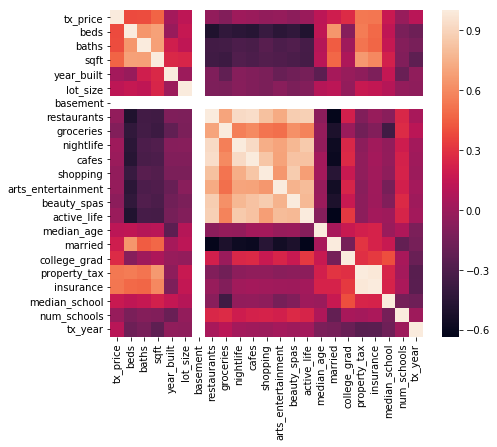

In [41]:
# Make the figsize 7 x 6
plt.figure(figsize=(7,6))


# Plot heatmap of correlations
sns.heatmap(correlations)
plt.show()

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 1.5</span>

When plotting a heatmap of correlations, it's often helpful to do three things:
1. Annotate the cell with their correlations values
2. Mask the top triangle (less visual noise)
3. Drop the legend (colorbar on the side)

<br>

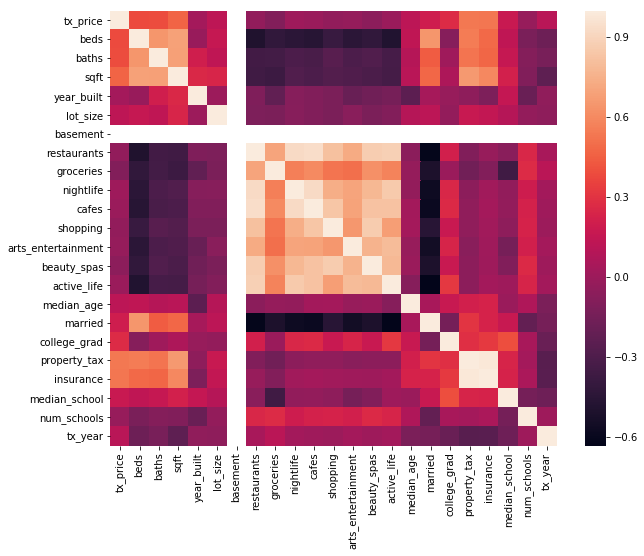

In [42]:
# Make the figsize 10 x 8
plt.figure(figsize=(10,8))


# Plot heatmap of correlations
sns.heatmap(correlations)
plt.show()

See how the cells for <code style="color:steelblue">'basement'</code> are now white? That's what we want because they were not able to be calculated.

<br>

**Next, display the correlation values in each cell.**

* The <code style="color:steelblue">annot=</code> argument controls whether to annotate each cell with its value. By default, it's <code style="color:crimson">False</code>.
* To make the chart cleaner, multiply the <code style="color:steelblue">correlations</code> DataFrame by 100 before passing it to the heatmap function.
* Pass in the argument <code style="color:steelblue">fmt=<span style="color:crimson">'.0f'</span></code> to format the annotations to a whole number.

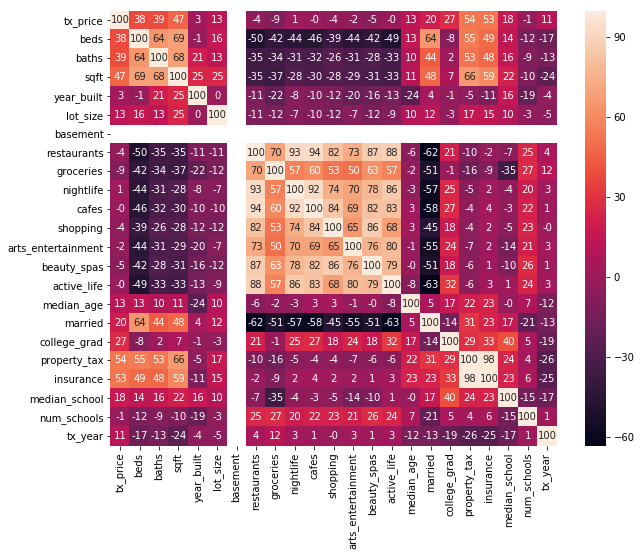

In [43]:
# Make the figsize 10 x 8
plt.figure(figsize=(10,8))


# Plot heatmap of annotated correlations
correlations = correlations * 100
sns.heatmap(correlations, annot=True, fmt='.0f')
plt.show()

#### Next, we'll generate a mask for the top triangle. Run this code:

In [46]:
# Generate a mask for the upper triangle
bool_mask = np.zeros_like(correlations, dtype=np.bool)
bool_mask[np.triu_indices_from(bool_mask)] = True

print(bool_mask)

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True]
 [False False False  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True]
 [False False False False  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True]
 [False False False False False  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True]
 [False False False False False False  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True]

<br>

**Plot the heatmap again, this time using that mask.**

* <code style="color:steelblue">sns.heatmap()</code> has a <code style="color:steelblue">mask=</code> argument.
* Keep all of the other styling changes you've made up to now.

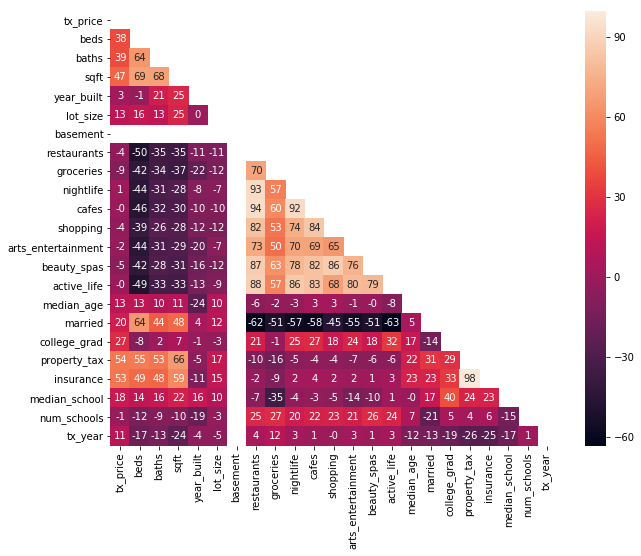

In [47]:
# Make the figsize 10 x 8
plt.figure(figsize=(10, 8))


# Plot heatmap of correlations
sns.heatmap(correlations, annot=True, fmt='.0f', mask=bool_mask)
plt.show()

<br>

**Finally, remove the colorbar on the side.**

* <code style="color:steelblue">sns.heatmap()</code> has a <code style="color:steelblue">cbar=</code> argument. By default, it's <code style="color:crimson">True</code>.
* Keep all of the other styling changes you've made up to now.
* But change the figure size to 9 x 8 (since we're removing the sidebar, this will help us keep nice proportions)

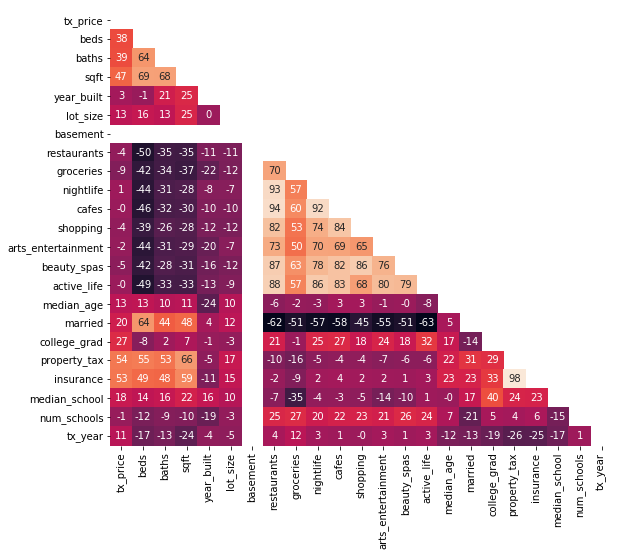

In [49]:
# Make the figsize 9 x 8
plt.figure(figsize=(9, 8))


# Plot heatmap of correlations
sns.heatmap(correlations, annot=True, fmt='.0f', mask=bool_mask, cbar=False)
plt.show()

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
    
[Back to Contents](#toc)
</div>

In [51]:
sg = df.groupby("property_type").corr().loc["Single-Family"]